In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import plotting

In [2]:
df_n = pd.read_csv('../data/technology_skill_30_by_job_pivot.csv')
df_n = df_n[0:100]
df_n[0:3]

,job_id_title,"(1, '!Trak-it Solutions !Trak-it HR')","(3, '1003 Uniform Residential Loan Application')","(7, '20-20 Technologies 20-20 Design')","(8, '24SevenOffice Project')","(9, '2AB iLock Security Services')","(10, '360 Analytics eQUEST')","(20, '3D urban simulation modeling software')","(22, '3M Electronic Monitoring')","(25, '3PL Central')",...,"(8694, 'iRealty Manager')","(8697, 'iSystems Evolution Payroll and Tax Management')","(8703, 'interactive Personnel Electronic Records Management System iPERMS')","(8712, 'medQ Q/ris')","(8720, 'people@work')","(8721, 'peoplefluent Performance')","(8722, 'peoplefluent Recruiting')","(8727, 'policyIQ')","(8737, 'web2project')","(8741, 'yieldWerx')"
0,"(469953, CONTRACT ANALYST)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"(470441, Heating Oversight Team Specialist)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"(470567, Data and Systems Manager)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


c:\Users\ACKI82\anaconda3\envs\py3.11.5\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


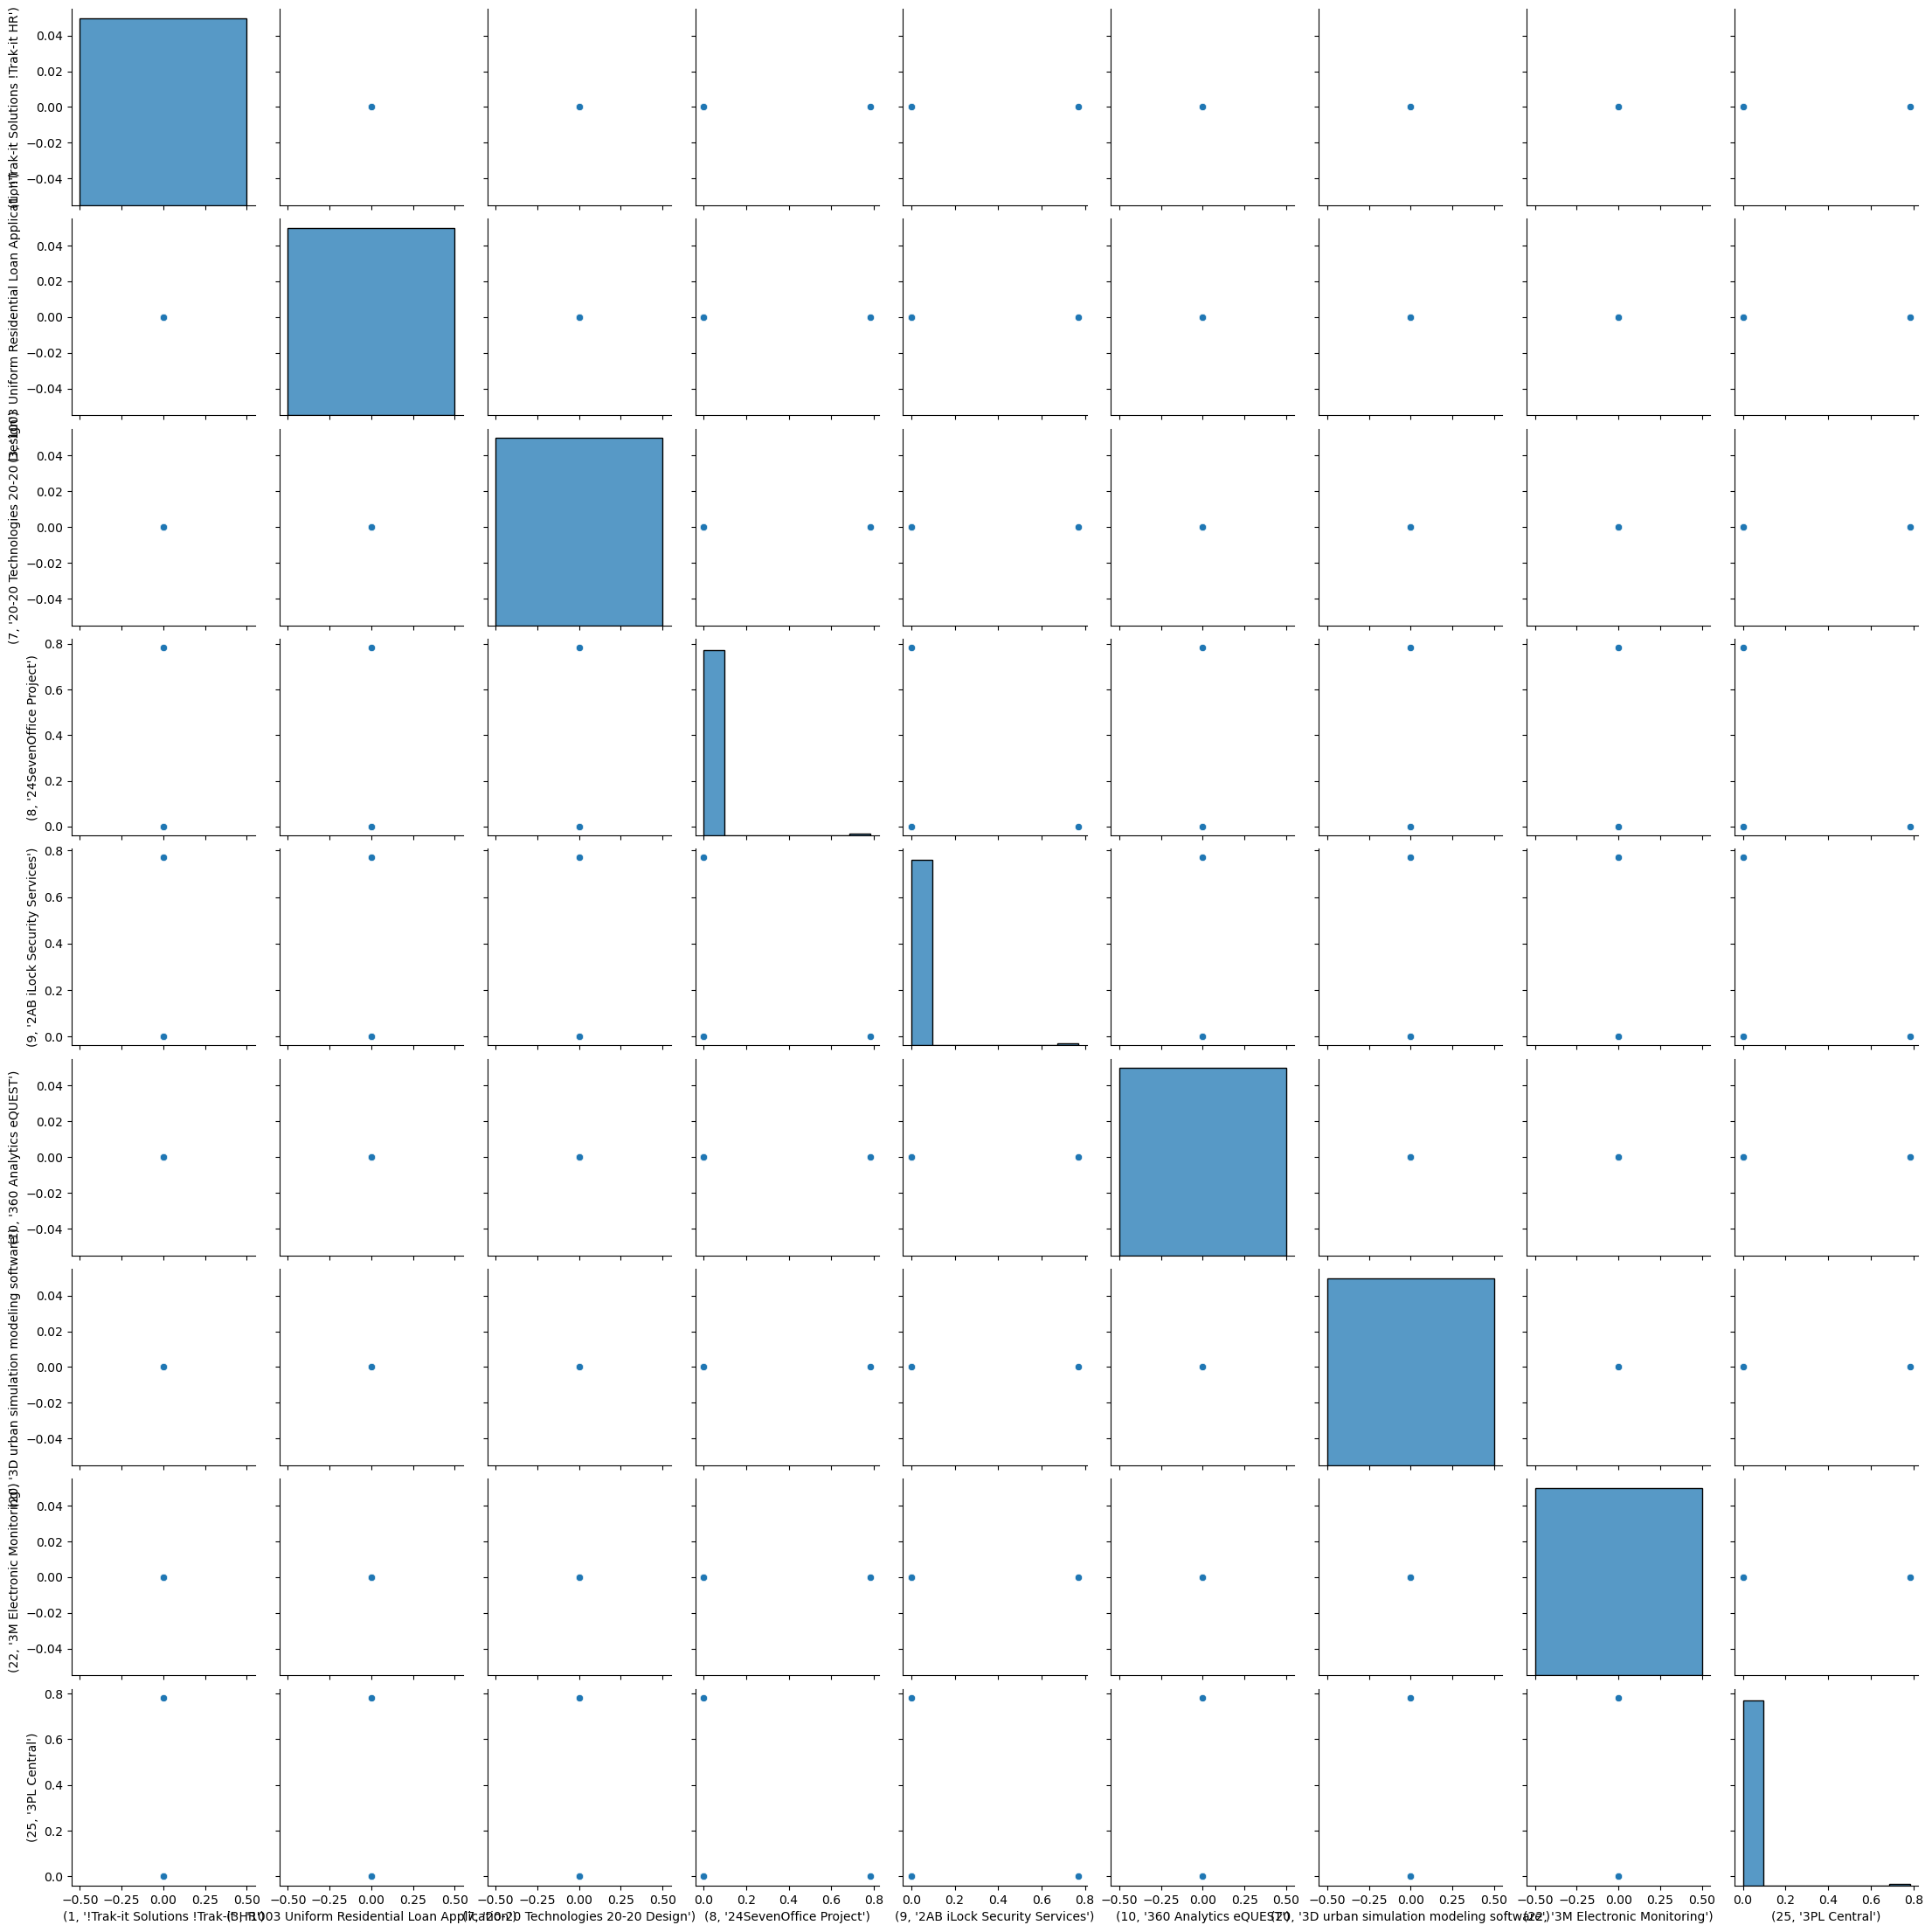

In [6]:
import seaborn as sns
sns.pairplot(df_n.iloc[0:,1:10])

# dendrogram

[6.4, 4.8]
10.0


c:\Users\ACKI82\anaconda3\envs\py3.11.5\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ACKI82\anaconda3\envs\py3.11.5\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 147 (\x93) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


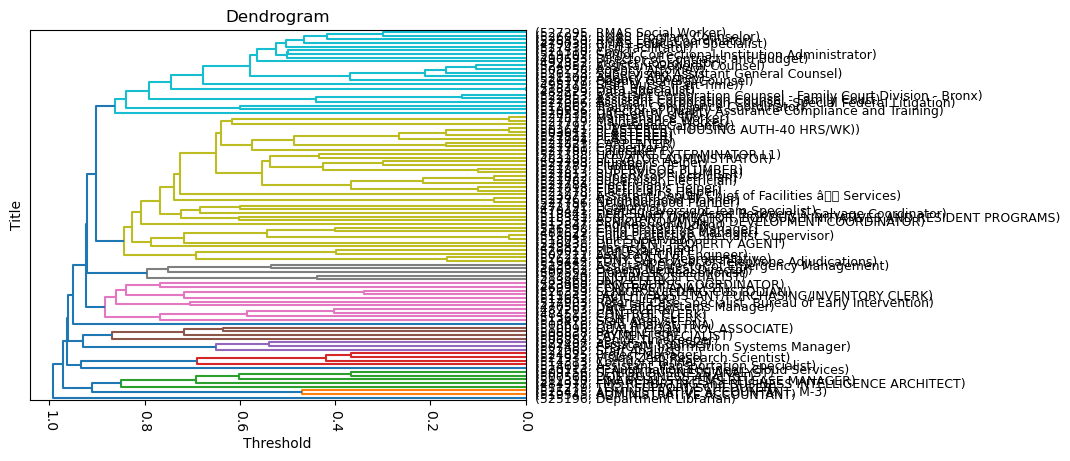

In [3]:
from scipy.cluster.hierarchy import linkage, dendrogram
result1 = linkage(df_n.iloc[0:, 1:], # metric = 'braycurtis', method = 'average')
    metric = 'braycurtis',
    #metric = 'canberra', 
    #metric = 'chebyshev', 
    #metric = 'cityblock', 
    #metric = 'correlation', 
    #metric = 'cosine', 
    #metric = 'euclidean', 
    #metric = 'hamming', 
    #metric = 'jaccard', 
    #method= 'single')
    method = 'average')
    #method= 'complete')
    #method='weighted')

dendrogram(result1, orientation='left', labels=df_n.iloc[0:, 0].values, color_threshold=0.9) # color_threshold=0.9

plt.title("Dendrogram")

plt.xlabel("Threshold")
plt.xticks(rotation=270)

plt.ylabel("Title")
plt.tick_params(axis='y', which='major', labelsize=9)

print(plt.rcParams['figure.figsize'])
print(plt.rcParams['font.size']) 
plt.rcParams["figure.figsize"] = (10, 20)
plt.rcParams["font.size"] = 8

plt.show()

# How changing Threshold changes the number of clusters and average cluster size

[10.0, 20.0]
8.0


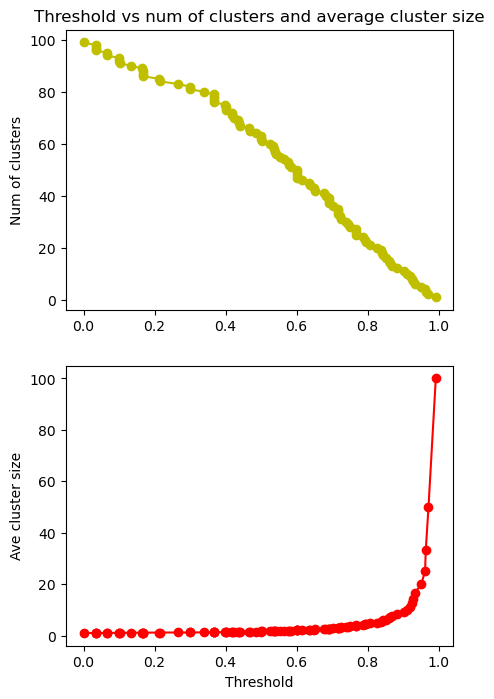

In [4]:
# How changing Threshold changes the number of clusters and average cluster size
import numpy as np
import matplotlib.pyplot as plt

n_clusters = len(df_n)
n_samples = len(df_n)
df1 = pd.DataFrame(result1)
x1 = []
y1 = []
x2 = []
y2 = []
for i in df1.index:
    n1 = int(df1.iloc[i][0])
    n2 = int(df1.iloc[i][1])
    val = df1.iloc[i][2]
    n_clusters -= 1
    x1.append(val)
    x2.append(val)
    y1.append(n_clusters)
    y2.append(float(n_samples) / float(n_clusters))

print(plt.rcParams['figure.figsize'])
print(plt.rcParams['font.size']) 
plt.rcParams["figure.figsize"] = (5, 8)
plt.rcParams["font.size"] = 10

plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'yo-')
plt.title('Threshold vs num of clusters and average cluster size')
plt.ylabel('Num of clusters')
plt.subplot(2, 1, 2)
plt.plot(x2, y2, 'ro-')
plt.xlabel('Threshold')
plt.ylabel('Ave cluster size')
plt.show()

# Functions

In [5]:
# Function to get clusters with specified thoreshold
def get_cluster_by_threshold(result, threshold):
    output_clusters = []
    output_cluster_ids = []
    x_result, y_result = result.shape
    n_clusters = x_result + 1
    cluster_id = x_result + 1
    father_of = {}
    df1 = pd.DataFrame(result)
    x1 = []
    y1 = []
    x2 = []
    y2 = []
    for i in df1.index:
        n1 = int(df1.iloc[i][0])
        n2 = int(df1.iloc[i][1])
        val = df1.iloc[i][2]
        n_clusters -= 1
        if val < threshold:
            father_of[n1] = cluster_id
            father_of[n2] = cluster_id

        cluster_id += 1

    cluster_dict = {}
    for n in range(x_result + 1):
        # if not father_of.has_key(n):
        if n not in father_of:
            output_clusters.append([n])
            continue

        n2 = n
        m = False
        # while father_of.has_key(n2):
        while n2 in father_of:
            m = father_of[n2]
            #print [n2, m]
            n2 = m

        # if not cluster_dict.has_key(m):
        if m not in cluster_dict:
            cluster_dict.update({m:[]})
        cluster_dict[m].append(n)

    output_clusters += cluster_dict.values()

    output_cluster_id = 0
    output_cluster_ids = [0] * (x_result + 1)
    for cluster in sorted(output_clusters):
        for i in cluster:
            output_cluster_ids[i] = output_cluster_id
        output_cluster_id += 1

    return output_cluster_ids

In [6]:
# Function to get clusters with a specified number of clusters
def get_cluster_by_number(result, number):
    output_clusters = []
    x_result, y_result = result.shape
    n_clusters = x_result + 1
    cluster_id = x_result + 1
    father_of = {}
    df1 = pd.DataFrame(result)
    x1 = []
    y1 = []
    x2 = []
    y2 = []
    for i in df1.index:
        n1 = int(df1.iloc[i][0])
        n2 = int(df1.iloc[i][1])
        val = df1.iloc[i][2]
        n_clusters -= 1
        if n_clusters >= number:
            father_of[n1] = cluster_id
            father_of[n2] = cluster_id

        cluster_id += 1

    cluster_dict = {}
    for n in range(x_result + 1):
        # if not father_of.has_key(n):
        if n not in father_of:
            output_clusters.append([n])
            continue

        n2 = n
        m = False
        while n2 in father_of:
            m = father_of[n2]
            #print [n2, m]
            n2 = m

        # if not cluster_dict.has_key(m):
        if m not in cluster_dict:
            cluster_dict.update({m:[]})
        cluster_dict[m].append(n)

    output_clusters += cluster_dict.values()

    output_cluster_id = 0
    output_cluster_ids = [0] * (x_result + 1)
    for cluster in sorted(output_clusters):
        for i in cluster:
            output_cluster_ids[i] = output_cluster_id
        output_cluster_id += 1

    return output_cluster_ids

# Get cluster with specified thoreshold

In [7]:
# Get cluster with specified thoreshold
cluster_list = np.array(get_cluster_by_threshold(result1, 0.8)) # change threshold here
print (cluster_list)


pd.options.display.max_colwidth=100

#print (cluster_list.reshape(-1, 1))
df_clusternum = pd.DataFrame(cluster_list.reshape(-1, 1))
df_clusternum = df_clusternum.rename(columns={0: 'cluster_num'})
df_n_cluster = pd.concat([df_clusternum, df_n], axis=1)
df_n_cluster = df_n_cluster.sort_values('cluster_num')
df_n_cluster.iloc[:,[1,0]]

left_aligned_df = df_n_cluster.iloc[:,[0,1]].style.set_properties(**{'text-align': 'left'})
left_aligned_df

[ 0  1  2  1  3  4  3  4  1  5  6  7  6  4  4  4  5  7  1  1  8  9 10 11
  5  4 12  7  8  8 13 14  7 15 15 13 16  6  6 17 17  1 10  2  3  3  1  4
  5  1  4 18 19 20  4  4 17 11 11  4  4  5  1  0 17  4 21 18 10  4  4  4
 10 15  3  4  3  4  4  4  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1]


,cluster_num,job_id_title
0,0,"(469953, CONTRACT ANALYST)"
63,0,"(523960, PROCEDURES COORDINATOR)"
98,1,"(527822, Supervisor Electrician)"
62,1,"(523879, Assistant Deputy Chief of Facilities â Services)"
80,1,"(527756, Neighborhood Planner)"
81,1,"(527762, Neighborhood Planner)"
82,1,"(527778, Electrician's Helper)"
83,1,"(527779, Maintenance Worker)"
84,1,"(527780, Caretaker P)"
85,1,"(527781, Carpenter)"


# Get clusters with a specified number of clusters

In [8]:
# Get clusters with a specified number of clusters
cluster_list = np.array(get_cluster_by_number(result1, 14)) # change the number of clusters
print (cluster_list)


pd.options.display.max_colwidth=100

#print (cluster_list.reshape(-1, 1))
df_clusternum = pd.DataFrame(cluster_list.reshape(-1, 1))
df_clusternum = df_clusternum.rename(columns={0: 'cluster_num'})
df_n_cluster = pd.concat([df_clusternum, df_n], axis=1)
df_n_cluster = df_n_cluster.sort_values('cluster_num')
df_n_cluster.iloc[:,[1,0]]

[ 0  1  0  1  1  2  1  2  1  3  4  5  4  2  2  2  3  5  1  1  6  7  1  8
  3  2  9  5  6  6  2  5  5  0  0  2  1  4  4 10 10  1  1  0  1  1  1  2
  3  1  2 11 12  2  2  2 10  8  8  2  2  3  1  0 10  2 13 11  1  2  2  2
  1  0  1  2  1  2  2  2  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1]


,job_id_title,cluster_num
0,"(469953, CONTRACT ANALYST)",0
73,"(526359, SENIOR BUILDING CUSTODIAN)",0
63,"(523960, PROCEDURES COORDINATOR)",0
43,"(517903, Referral Case Specialist, Bureau of Early Intervention)",0
34,"(512652, UNIT CLERK)",0
...,...,...
64,"(524625, Project Manager)",10
51,"(519545, ADMINISTRATIVE ACCOUNTANT)",11
67,"(525425, ADMINISTRATIVE ACCOUNTANT, M-3)",11
52,"(520114, IT Automation Engineer, Cloud Services)",12


# Mapping clustering results to plots of principal component analysis

[5.0, 8.0]


c:\Users\ACKI82\anaconda3\envs\py3.11.5\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ACKI82\anaconda3\envs\py3.11.5\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 147 (\x93) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


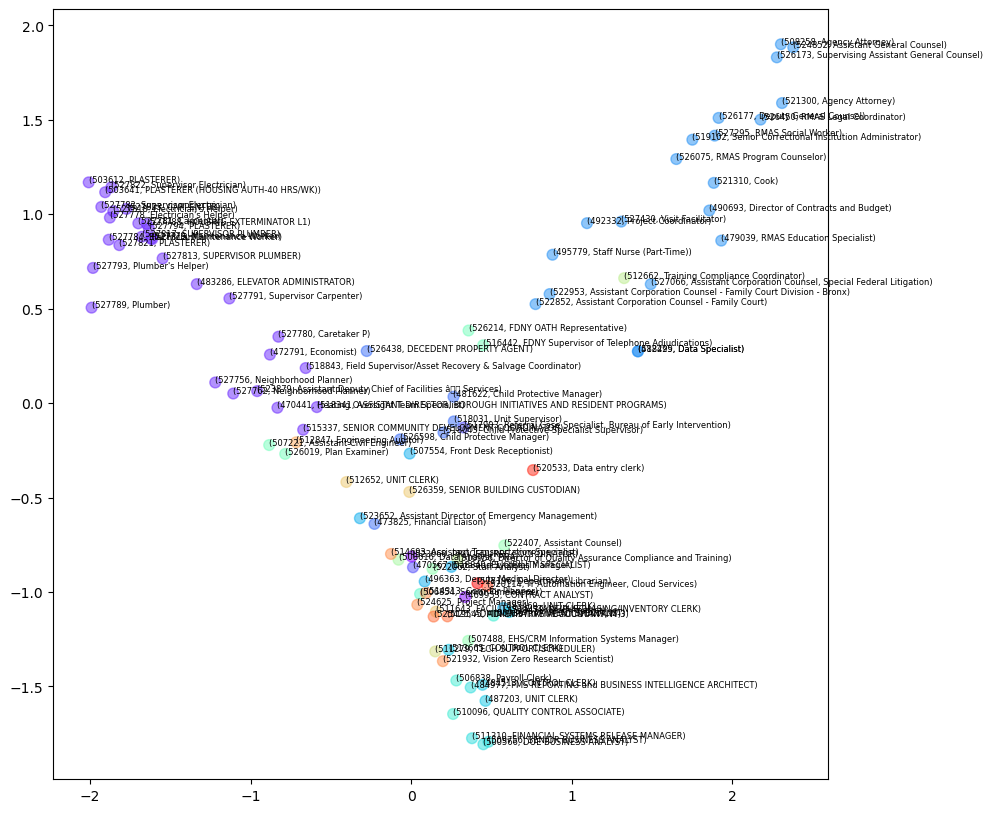

In [9]:
# Mapping clustering results to plots of principal component analysis
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df_n[df_n.columns[1:]])
feature = pca.transform(df_n[df_n.columns[1:]])

print(plt.rcParams['figure.figsize'])
plt.rcParams["figure.figsize"] = (10, 10)

plt.scatter(feature[:, 0], feature[:, 1], c=get_cluster_by_number(result1, 22), s=60, alpha=0.5, # change the number of clusters
            cmap=plt.cm.rainbow)

num = len(df_n)
for i in range(num):
    plt.text(feature[i,0], feature[i,1], df_n.iloc[i,0], horizontalalignment="left", fontsize=6) #, verticalalignment="right"

plt.show()